In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import shap

data = pd.read_csv('/Users/yunjuha/Desktop/SROP/DXA_BIS_Project/2023-07-14/2023-07-14_data_transformation.csv')
df = pd.DataFrame(data)
df = df.dropna()

# Random Forest Models for HANDGRIP STRENGTH

## BIS

### (E/I)w

In [ ]:
#setting predictor (X) and target (y)
X = df.drop(columns = ['jumppownums', 'RA4IMaxGrip', 'RA4IALM', 'RA4IALMbyE2Icor', 'RA4ILLM', 'RA4ILLMbyLE2Icor', 'RA4ILegE2I'])
y = df['RA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head())
print(X_test.head())

print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))

#random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("\nTest set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

#SHAP plot
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

### (E/I)L

     RA4DTBLMkg  RA4IALMbyHt2  RA4IMECF  RA4IMICF  RA4IMTBW   RA4IE2I  \
138    3.999319      2.117772  3.018472  3.162940  3.784417 -0.035720   
60     3.918979      2.195593  2.855320  3.201933  3.734331 -0.215818   
207    3.986537      2.108011  3.044999  3.192121  3.812203 -0.038093   
165    3.801650      1.874567  2.665143  2.990720  3.531348 -0.197589   
206    4.192545      2.268729  3.251149  3.425890  4.033710 -0.062778   

     RA4IMFFM  RA4IALMbyE2I  RA4IECFbyTBW    RA4P1A  ...  RA4DGYFM   RA4DTBFM  \
138  4.095677      3.309823     -0.573276  5.133443  ...  8.466131  10.433383   
60   4.045679      3.545615     -0.665935  5.110782  ...  8.975137  10.862111   
207  4.123580      3.375345     -0.574257  5.169916  ...  8.411410  10.405144   
165  3.842459      3.275066     -0.656153  5.148076  ...  8.279215   9.779516   
206  4.345103      3.610863     -0.586500  5.192957  ...  8.651742  10.670631   

     RA4IMFFMP  RA4IMICFP  RA4IMICFWT  RA1PRSEX  RA1PF7A  Age_40_50  \
138

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


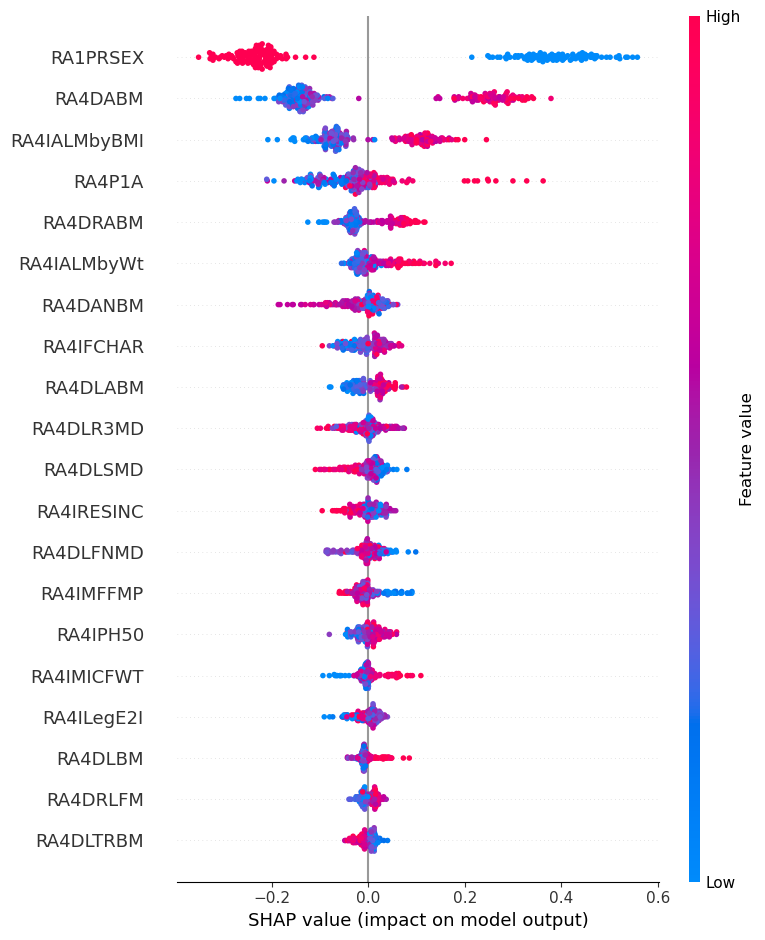

In [8]:
#setting predictor (X) and target (y)
X = df.drop(columns = ['jumppownums', 'RA4IMaxGrip', 'RA4IALM', 'RA4IALMbyE2Icor', 'RA4ILLM', 'RA4ILLMbyLE2Icor', 'RA4IcorE2I'])
y = df['RA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head())
print(X_test.head())

print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))

#random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Test set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

#SHAP plot
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

## DXA

### ALM

     RA4DTBLMkg   RA4IALM  RA4IALMbyHt2  RA4IMECF  RA4IMICF  RA4IMTBW  \
138    3.999319  3.165264      2.117772  3.018472  3.162940  3.784417   
60     3.918979  3.198510      2.195593  2.855320  3.201933  3.734331   
207    3.986537  3.228113      2.108011  3.044999  3.192121  3.812203   
165    3.801650  2.949007      1.874567  2.665143  2.990720  3.531348   
206    4.192545  3.436017      2.268729  3.251149  3.425890  4.033710   

      RA4IE2I  RA4IMFFM  RA4IALMbyE2I  RA4IECFbyTBW  ...  RA4DGYFM   RA4DTBFM  \
138 -0.035720  4.095677      3.309823     -0.573276  ...  8.466131  10.433383   
60  -0.215818  4.045679      3.545615     -0.665935  ...  8.975137  10.862111   
207 -0.038093  4.123580      3.375345     -0.574257  ...  8.411410  10.405144   
165 -0.197589  3.842459      3.275066     -0.656153  ...  8.279215   9.779516   
206 -0.062778  4.345103      3.610863     -0.586500  ...  8.651742  10.670631   

     RA4IMFFMP  RA4IMICFP  RA4IMICFWT  RA1PRSEX  RA1PF7A  Age_40_50  \
138

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


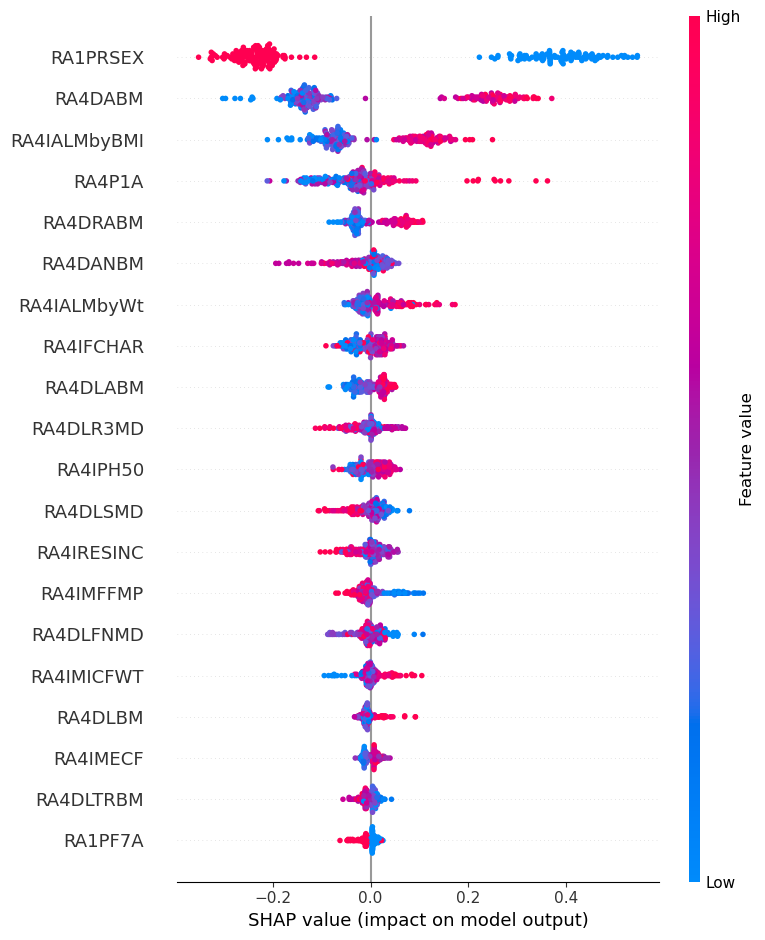

In [11]:
#setting predictor (X) and target (y)
X = df.drop(columns = ['jumppownums', 'RA4IMaxGrip', 'RA4IALMbyE2Icor', 'RA4ILLM', 'RA4ILLMbyLE2Icor', 'RA4ILegE2I', 'RA4IcorE2I'])
y = df['RA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head())
print(X_test.head())

print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))

#random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Test set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

#SHAP plot
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

### LLM

     RA4DTBLMkg  RA4IALMbyHt2  RA4IMECF  RA4IMICF  RA4IMTBW   RA4IE2I  \
138    3.999319      2.117772  3.018472  3.162940  3.784417 -0.035720   
60     3.918979      2.195593  2.855320  3.201933  3.734331 -0.215818   
207    3.986537      2.108011  3.044999  3.192121  3.812203 -0.038093   
165    3.801650      1.874567  2.665143  2.990720  3.531348 -0.197589   
206    4.192545      2.268729  3.251149  3.425890  4.033710 -0.062778   

     RA4IMFFM  RA4IALMbyE2I  RA4IECFbyTBW    RA4P1A  ...  RA4DGYFM   RA4DTBFM  \
138  4.095677      3.309823     -0.573276  5.133443  ...  8.466131  10.433383   
60   4.045679      3.545615     -0.665935  5.110782  ...  8.975137  10.862111   
207  4.123580      3.375345     -0.574257  5.169916  ...  8.411410  10.405144   
165  3.842459      3.275066     -0.656153  5.148076  ...  8.279215   9.779516   
206  4.345103      3.610863     -0.586500  5.192957  ...  8.651742  10.670631   

     RA4IMFFMP  RA4IMICFP  RA4IMICFWT  RA1PRSEX  RA1PF7A  Age_40_50  \
138

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


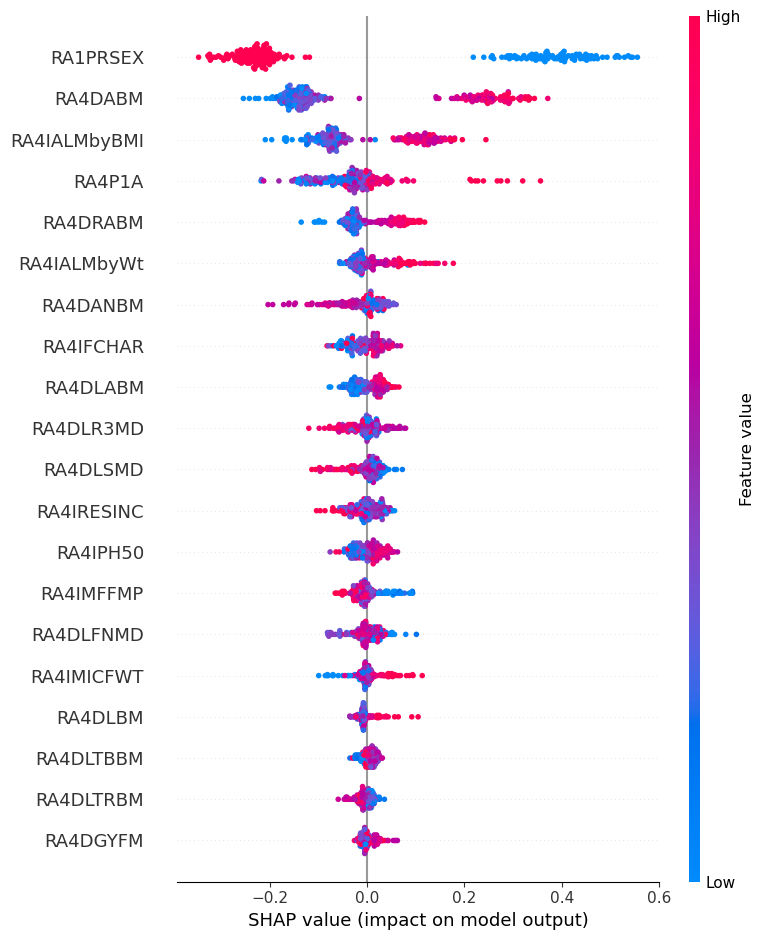

In [13]:
#setting predictor (X) and target (y)
X = df.drop(columns = ['jumppownums', 'RA4IMaxGrip', 'RA4IALMbyE2Icor', 'RA4IALM', 'RA4ILLMbyLE2Icor', 'RA4ILegE2I', 'RA4IcorE2I'])
y = df['RA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head())
print(X_test.head())

print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))

#random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Test set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

#SHAP plot
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

## DXA + BIS

### ALM / (E/I)w

     RA4DTBLMkg  RA4IALMbyHt2  RA4IMECF  RA4IMICF  RA4IMTBW   RA4IE2I  \
138    3.999319      2.117772  3.018472  3.162940  3.784417 -0.035720   
60     3.918979      2.195593  2.855320  3.201933  3.734331 -0.215818   
207    3.986537      2.108011  3.044999  3.192121  3.812203 -0.038093   
165    3.801650      1.874567  2.665143  2.990720  3.531348 -0.197589   
206    4.192545      2.268729  3.251149  3.425890  4.033710 -0.062778   

     RA4IMFFM  RA4IALMbyE2I  RA4IECFbyTBW    RA4P1A  ...  RA4DGYFM   RA4DTBFM  \
138  4.095677      3.309823     -0.573276  5.133443  ...  8.466131  10.433383   
60   4.045679      3.545615     -0.665935  5.110782  ...  8.975137  10.862111   
207  4.123580      3.375345     -0.574257  5.169916  ...  8.411410  10.405144   
165  3.842459      3.275066     -0.656153  5.148076  ...  8.279215   9.779516   
206  4.345103      3.610863     -0.586500  5.192957  ...  8.651742  10.670631   

     RA4IMFFMP  RA4IMICFP  RA4IMICFWT  RA1PRSEX  RA1PF7A  Age_40_50  \
138

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


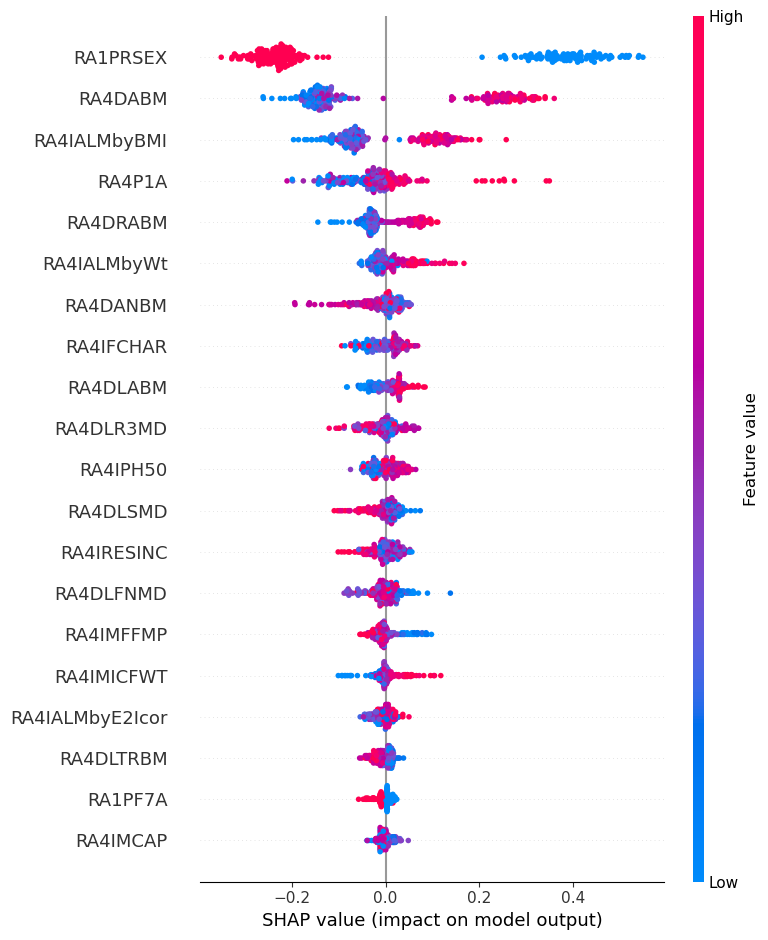

In [16]:
#setting predictor (X) and target (y)
X = df.drop(columns = ['jumppownums', 'RA4IMaxGrip', 'RA4ILLM', 'RA4IALM', 'RA4ILLMbyLE2Icor', 'RA4ILegE2I', 'RA4IcorE2I'])
y = df['RA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head())
print(X_test.head())

print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))

#random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Test set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

#SHAP plot
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

### LLM / (E/I)L

     RA4DTBLMkg  RA4IALMbyHt2  RA4IMECF  RA4IMICF  RA4IMTBW   RA4IE2I  \
138    3.999319      2.117772  3.018472  3.162940  3.784417 -0.035720   
60     3.918979      2.195593  2.855320  3.201933  3.734331 -0.215818   
207    3.986537      2.108011  3.044999  3.192121  3.812203 -0.038093   
165    3.801650      1.874567  2.665143  2.990720  3.531348 -0.197589   
206    4.192545      2.268729  3.251149  3.425890  4.033710 -0.062778   

     RA4IMFFM  RA4IALMbyE2I  RA4IECFbyTBW    RA4P1A  ...  RA4DGYFM   RA4DTBFM  \
138  4.095677      3.309823     -0.573276  5.133443  ...  8.466131  10.433383   
60   4.045679      3.545615     -0.665935  5.110782  ...  8.975137  10.862111   
207  4.123580      3.375345     -0.574257  5.169916  ...  8.411410  10.405144   
165  3.842459      3.275066     -0.656153  5.148076  ...  8.279215   9.779516   
206  4.345103      3.610863     -0.586500  5.192957  ...  8.651742  10.670631   

     RA4IMFFMP  RA4IMICFP  RA4IMICFWT  RA1PRSEX  RA1PF7A  Age_40_50  \
138

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


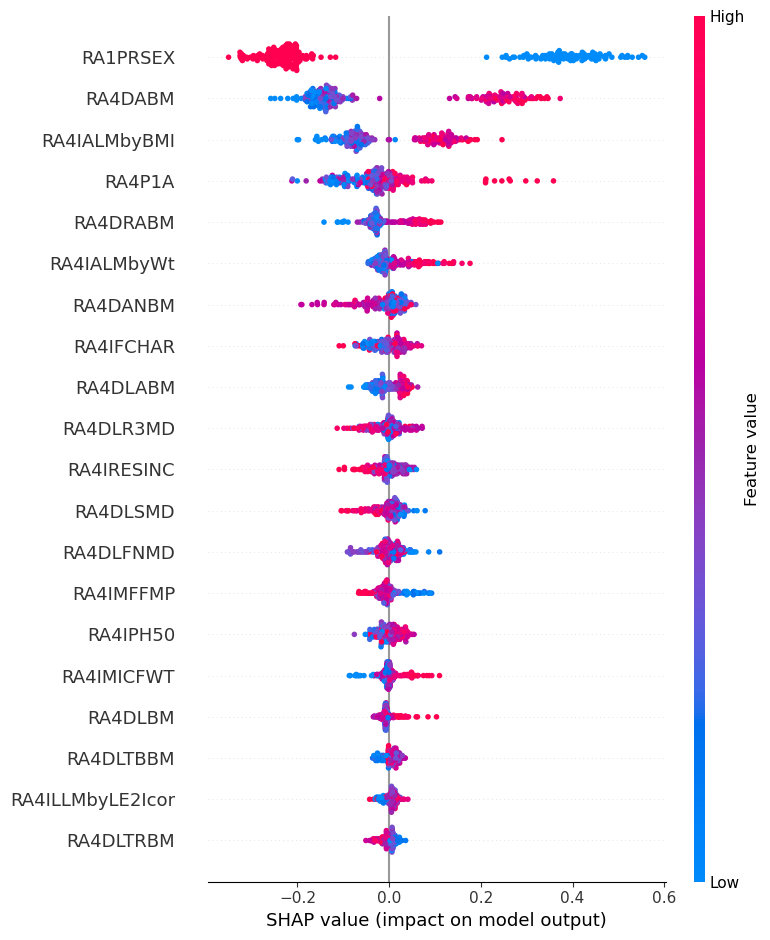

In [18]:
#setting predictor (X) and target (y)
X = df.drop(columns = ['jumppownums', 'RA4IMaxGrip', 'RA4ILLM', 'RA4IALM', 'RA4IALMbyE2Icor', 'RA4ILegE2I', 'RA4IcorE2I'])
y = df['RA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head())
print(X_test.head())

print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))

#random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Test set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

#SHAP plot
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

# Random Forest Models for JUMP POWER

## BIS

### (E/I)w

     RA4DTBLMkg  RA4IALMbyHt2  RA4IMECF  RA4IMICF  RA4IMTBW   RA4IE2I  \
138    3.999319      2.117772  3.018472  3.162940  3.784417 -0.035720   
60     3.918979      2.195593  2.855320  3.201933  3.734331 -0.215818   
207    3.986537      2.108011  3.044999  3.192121  3.812203 -0.038093   
165    3.801650      1.874567  2.665143  2.990720  3.531348 -0.197589   
206    4.192545      2.268729  3.251149  3.425890  4.033710 -0.062778   

     RA4IMFFM  RA4IALMbyE2I  RA4IECFbyTBW    RA4P1A  ...  RA4DGYFM   RA4DTBFM  \
138  4.095677      3.309823     -0.573276  5.133443  ...  8.466131  10.433383   
60   4.045679      3.545615     -0.665935  5.110782  ...  8.975137  10.862111   
207  4.123580      3.375345     -0.574257  5.169916  ...  8.411410  10.405144   
165  3.842459      3.275066     -0.656153  5.148076  ...  8.279215   9.779516   
206  4.345103      3.610863     -0.586500  5.192957  ...  8.651742  10.670631   

     RA4IMFFMP  RA4IMICFP  RA4IMICFWT  RA1PRSEX  RA1PF7A  Age_40_50  \
138

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


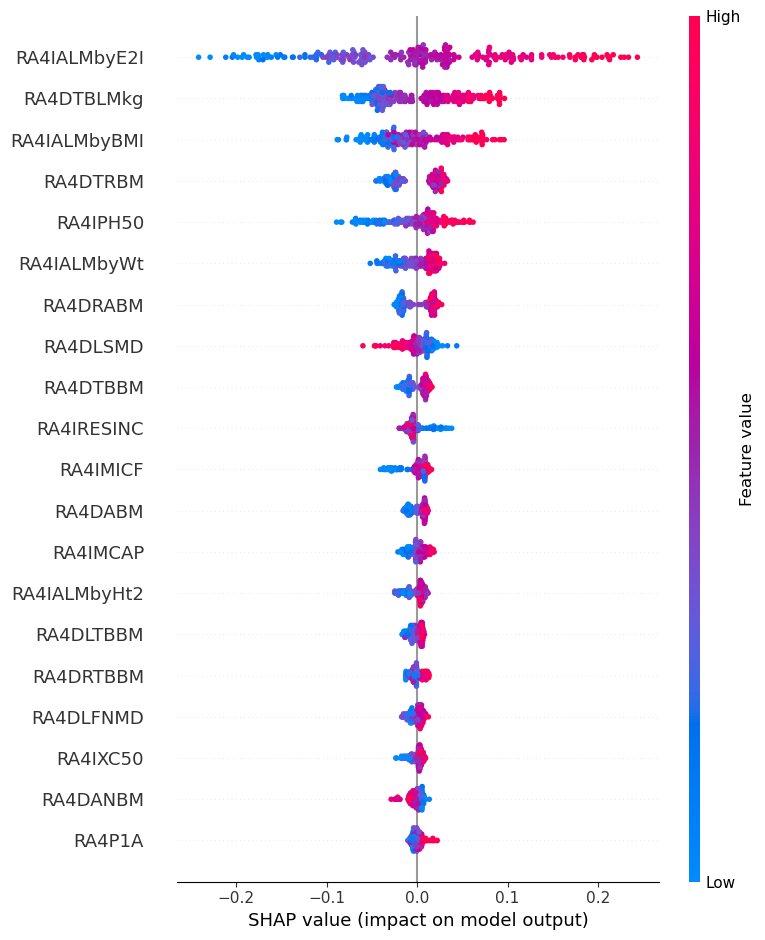

In [19]:
#setting predictor (X) and target (y)
X = df.drop(columns = ['jumppownums', 'RA4IMaxGrip', 'RA4IALM', 'RA4IALMbyE2Icor', 'RA4ILLM', 'RA4ILLMbyLE2Icor', 'RA4ILegE2I'])
y = df['jumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head())
print(X_test.head())

print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))

#random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("\nTest set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

#SHAP plot
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

### (E/I)L

     RA4DTBLMkg  RA4IALMbyHt2  RA4IMECF  RA4IMICF  RA4IMTBW   RA4IE2I  \
138    3.999319      2.117772  3.018472  3.162940  3.784417 -0.035720   
60     3.918979      2.195593  2.855320  3.201933  3.734331 -0.215818   
207    3.986537      2.108011  3.044999  3.192121  3.812203 -0.038093   
165    3.801650      1.874567  2.665143  2.990720  3.531348 -0.197589   
206    4.192545      2.268729  3.251149  3.425890  4.033710 -0.062778   

     RA4IMFFM  RA4IALMbyE2I  RA4IECFbyTBW    RA4P1A  ...  RA4DGYFM   RA4DTBFM  \
138  4.095677      3.309823     -0.573276  5.133443  ...  8.466131  10.433383   
60   4.045679      3.545615     -0.665935  5.110782  ...  8.975137  10.862111   
207  4.123580      3.375345     -0.574257  5.169916  ...  8.411410  10.405144   
165  3.842459      3.275066     -0.656153  5.148076  ...  8.279215   9.779516   
206  4.345103      3.610863     -0.586500  5.192957  ...  8.651742  10.670631   

     RA4IMFFMP  RA4IMICFP  RA4IMICFWT  RA1PRSEX  RA1PF7A  Age_40_50  \
138

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


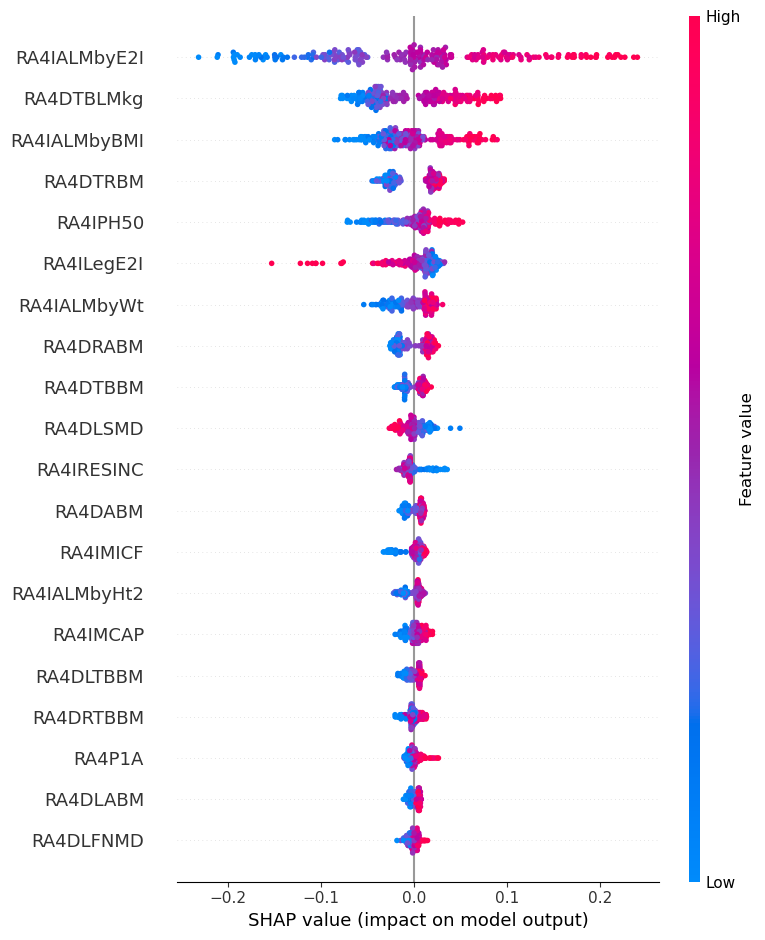

In [20]:
#setting predictor (X) and target (y)
X = df.drop(columns = ['jumppownums', 'RA4IMaxGrip', 'RA4IALM', 'RA4IALMbyE2Icor', 'RA4ILLM', 'RA4ILLMbyLE2Icor', 'RA4IcorE2I'])
y = df['jumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head())
print(X_test.head())

print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))

#random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Test set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

#SHAP plot
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

## DXA

### ALM

     RA4DTBLMkg   RA4IALM  RA4IALMbyHt2  RA4IMECF  RA4IMICF  RA4IMTBW  \
138    3.999319  3.165264      2.117772  3.018472  3.162940  3.784417   
60     3.918979  3.198510      2.195593  2.855320  3.201933  3.734331   
207    3.986537  3.228113      2.108011  3.044999  3.192121  3.812203   
165    3.801650  2.949007      1.874567  2.665143  2.990720  3.531348   
206    4.192545  3.436017      2.268729  3.251149  3.425890  4.033710   

      RA4IE2I  RA4IMFFM  RA4IALMbyE2I  RA4IECFbyTBW  ...  RA4DGYFM   RA4DTBFM  \
138 -0.035720  4.095677      3.309823     -0.573276  ...  8.466131  10.433383   
60  -0.215818  4.045679      3.545615     -0.665935  ...  8.975137  10.862111   
207 -0.038093  4.123580      3.375345     -0.574257  ...  8.411410  10.405144   
165 -0.197589  3.842459      3.275066     -0.656153  ...  8.279215   9.779516   
206 -0.062778  4.345103      3.610863     -0.586500  ...  8.651742  10.670631   

     RA4IMFFMP  RA4IMICFP  RA4IMICFWT  RA1PRSEX  RA1PF7A  Age_40_50  \
138

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


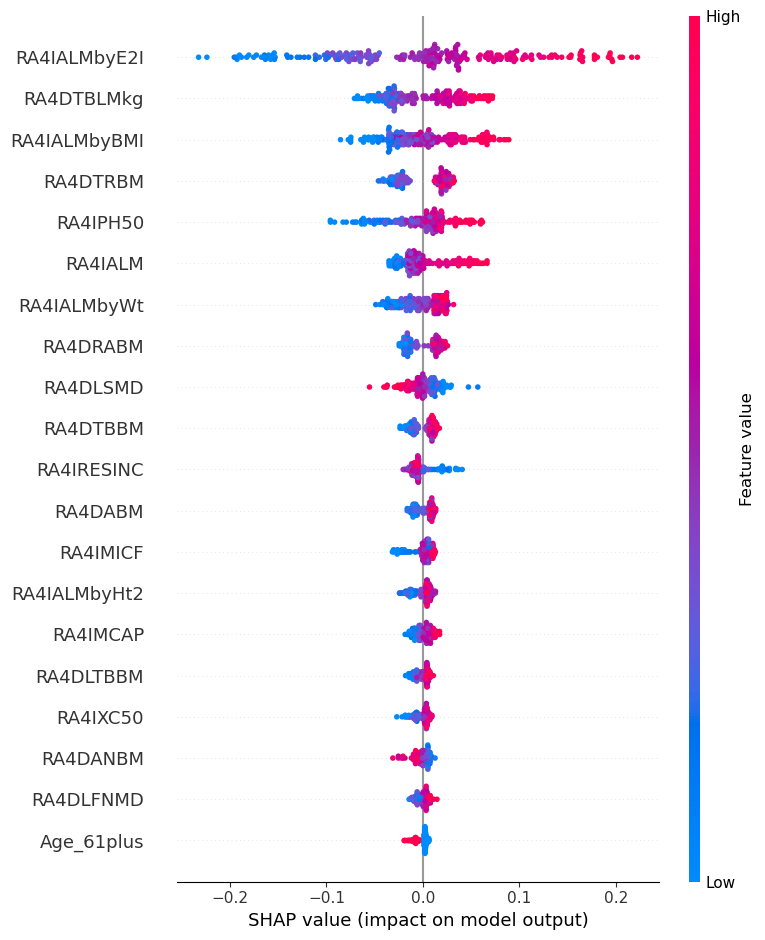

In [21]:
#setting predictor (X) and target (y)
X = df.drop(columns = ['jumppownums', 'RA4IMaxGrip', 'RA4IALMbyE2Icor', 'RA4ILLM', 'RA4ILLMbyLE2Icor', 'RA4ILegE2I', 'RA4IcorE2I'])
y = df['jumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head())
print(X_test.head())

print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))

#random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Test set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

#SHAP plot
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

### LLM

     RA4DTBLMkg  RA4IALMbyHt2  RA4IMECF  RA4IMICF  RA4IMTBW   RA4IE2I  \
138    3.999319      2.117772  3.018472  3.162940  3.784417 -0.035720   
60     3.918979      2.195593  2.855320  3.201933  3.734331 -0.215818   
207    3.986537      2.108011  3.044999  3.192121  3.812203 -0.038093   
165    3.801650      1.874567  2.665143  2.990720  3.531348 -0.197589   
206    4.192545      2.268729  3.251149  3.425890  4.033710 -0.062778   

     RA4IMFFM  RA4IALMbyE2I  RA4IECFbyTBW    RA4P1A  ...  RA4DGYFM   RA4DTBFM  \
138  4.095677      3.309823     -0.573276  5.133443  ...  8.466131  10.433383   
60   4.045679      3.545615     -0.665935  5.110782  ...  8.975137  10.862111   
207  4.123580      3.375345     -0.574257  5.169916  ...  8.411410  10.405144   
165  3.842459      3.275066     -0.656153  5.148076  ...  8.279215   9.779516   
206  4.345103      3.610863     -0.586500  5.192957  ...  8.651742  10.670631   

     RA4IMFFMP  RA4IMICFP  RA4IMICFWT  RA1PRSEX  RA1PF7A  Age_40_50  \
138

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


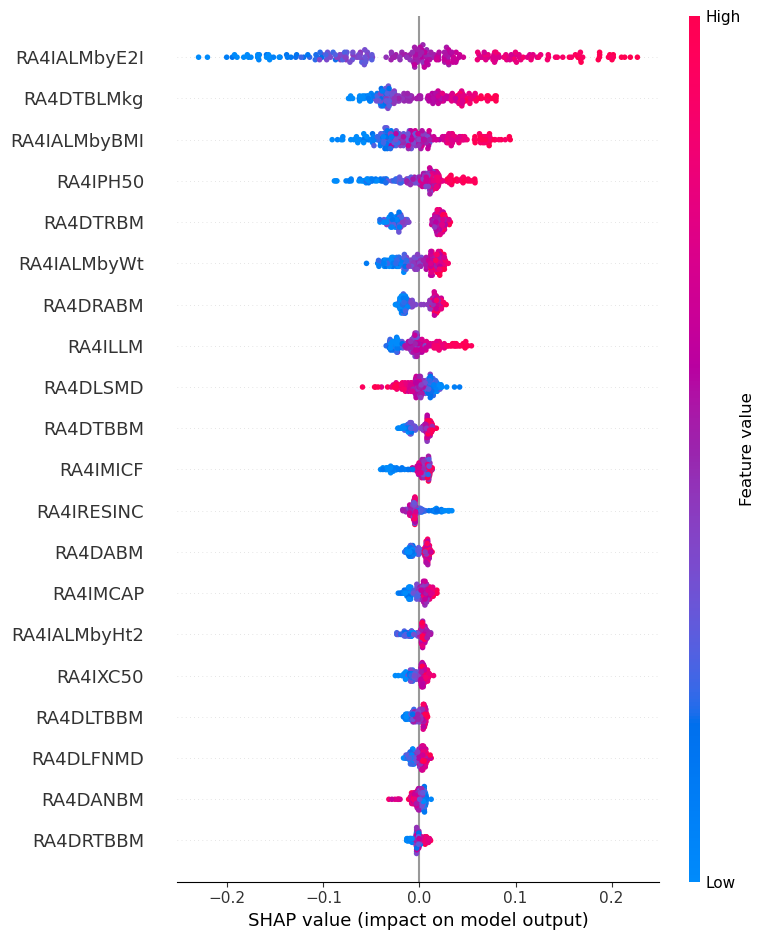

In [22]:
#setting predictor (X) and target (y)
X = df.drop(columns = ['jumppownums', 'RA4IMaxGrip', 'RA4IALMbyE2Icor', 'RA4IALM', 'RA4ILLMbyLE2Icor', 'RA4ILegE2I', 'RA4IcorE2I'])
y = df['jumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head())
print(X_test.head())

print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))

#random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Test set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

#SHAP plot
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

## DXA + BIS

### ALM / (E/I)w

     RA4DTBLMkg  RA4IALMbyHt2  RA4IMECF  RA4IMICF  RA4IMTBW   RA4IE2I  \
138    3.999319      2.117772  3.018472  3.162940  3.784417 -0.035720   
60     3.918979      2.195593  2.855320  3.201933  3.734331 -0.215818   
207    3.986537      2.108011  3.044999  3.192121  3.812203 -0.038093   
165    3.801650      1.874567  2.665143  2.990720  3.531348 -0.197589   
206    4.192545      2.268729  3.251149  3.425890  4.033710 -0.062778   

     RA4IMFFM  RA4IALMbyE2I  RA4IECFbyTBW    RA4P1A  ...  RA4DGYFM   RA4DTBFM  \
138  4.095677      3.309823     -0.573276  5.133443  ...  8.466131  10.433383   
60   4.045679      3.545615     -0.665935  5.110782  ...  8.975137  10.862111   
207  4.123580      3.375345     -0.574257  5.169916  ...  8.411410  10.405144   
165  3.842459      3.275066     -0.656153  5.148076  ...  8.279215   9.779516   
206  4.345103      3.610863     -0.586500  5.192957  ...  8.651742  10.670631   

     RA4IMFFMP  RA4IMICFP  RA4IMICFWT  RA1PRSEX  RA1PF7A  Age_40_50  \
138

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


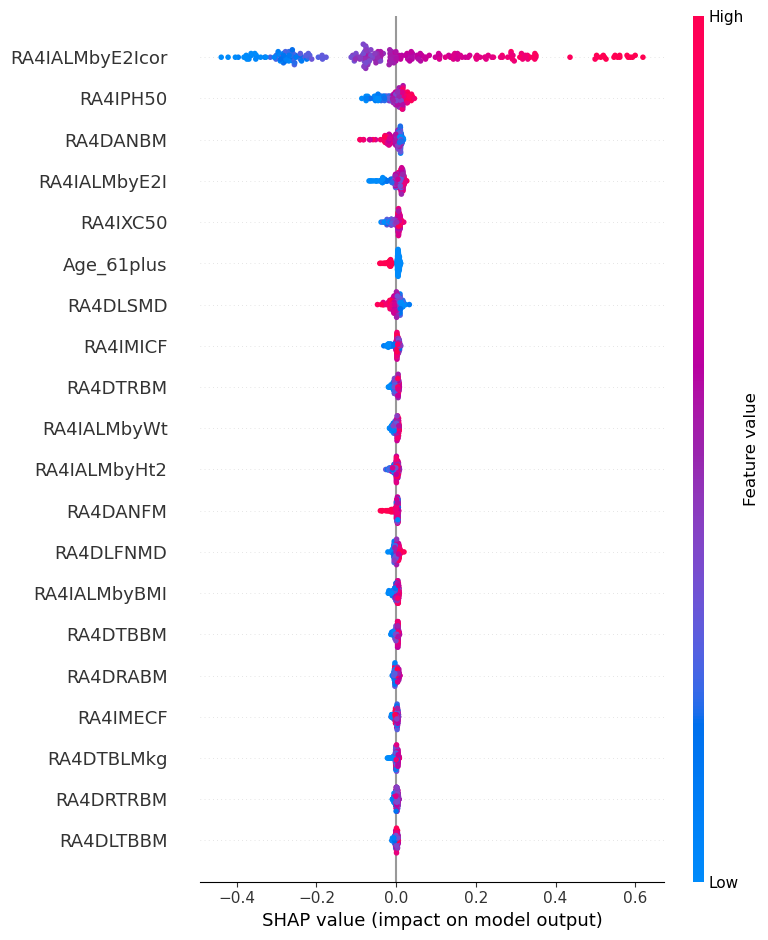

In [23]:
#setting predictor (X) and target (y)
X = df.drop(columns = ['jumppownums', 'RA4IMaxGrip', 'RA4ILLM', 'RA4IALM', 'RA4ILLMbyLE2Icor', 'RA4ILegE2I', 'RA4IcorE2I'])
y = df['jumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head())
print(X_test.head())

print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))

#random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Test set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

#SHAP plot
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

### LLM / (E/I)L

     RA4DTBLMkg  RA4IALMbyHt2  RA4IMECF  RA4IMICF  RA4IMTBW   RA4IE2I  \
138    3.999319      2.117772  3.018472  3.162940  3.784417 -0.035720   
60     3.918979      2.195593  2.855320  3.201933  3.734331 -0.215818   
207    3.986537      2.108011  3.044999  3.192121  3.812203 -0.038093   
165    3.801650      1.874567  2.665143  2.990720  3.531348 -0.197589   
206    4.192545      2.268729  3.251149  3.425890  4.033710 -0.062778   

     RA4IMFFM  RA4IALMbyE2I  RA4IECFbyTBW    RA4P1A  ...  RA4DGYFM   RA4DTBFM  \
138  4.095677      3.309823     -0.573276  5.133443  ...  8.466131  10.433383   
60   4.045679      3.545615     -0.665935  5.110782  ...  8.975137  10.862111   
207  4.123580      3.375345     -0.574257  5.169916  ...  8.411410  10.405144   
165  3.842459      3.275066     -0.656153  5.148076  ...  8.279215   9.779516   
206  4.345103      3.610863     -0.586500  5.192957  ...  8.651742  10.670631   

     RA4IMFFMP  RA4IMICFP  RA4IMICFWT  RA1PRSEX  RA1PF7A  Age_40_50  \
138

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


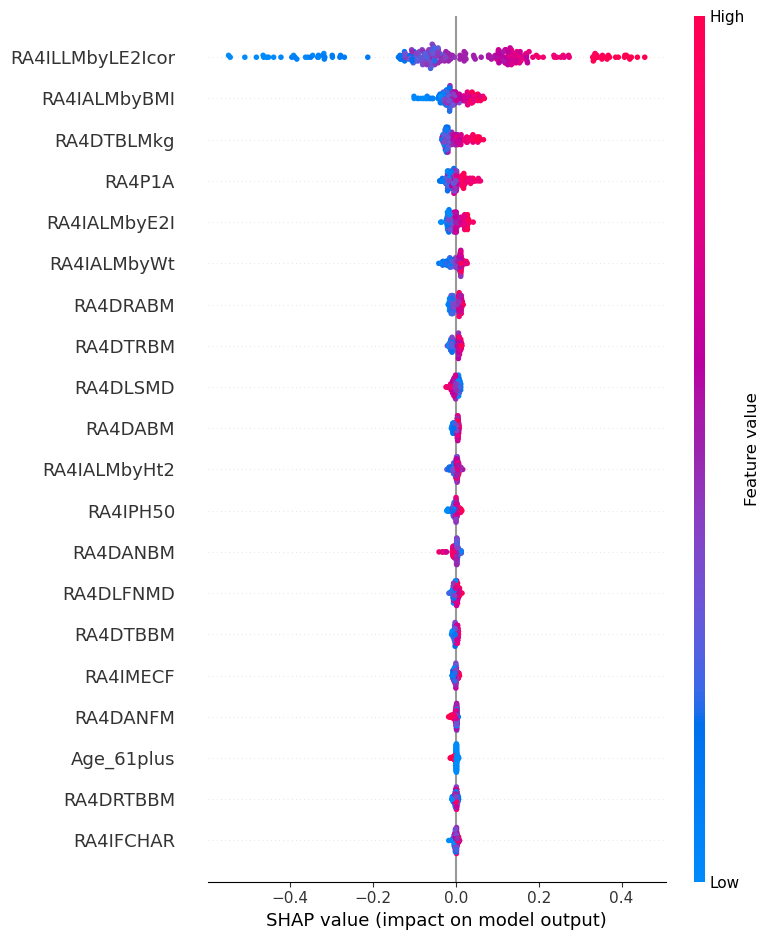

In [24]:
#setting predictor (X) and target (y)
X = df.drop(columns = ['jumppownums', 'RA4IMaxGrip', 'RA4ILLM', 'RA4IALM', 'RA4IALMbyE2Icor', 'RA4ILegE2I', 'RA4IcorE2I'])
y = df['jumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head())
print(X_test.head())

print("\nTraining set size:", len(X_train))
print("Testing set size:", len(X_test))

#random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Test set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

#SHAP plot
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)